# Importing libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [53]:
data=pd.read_csv(r"C:\Users\USER\Desktop\ICT DATASCIENCE\mainproject\train_exit.csv")

In [54]:
#Display maximum columns
pd.set_option('display.max_columns',None)
data

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,shot_accuracy,body_strength_stamina,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,59.0,41.0,73.0,13.0,69.0,70.0,36.0,50.0,72.0,24.4,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,62.0,53.0,43.0,10.0,30.0,50.0,30.0,53.0,54.0,22.6,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,69.0,49.0,45.0,10.0,57.0,37.0,18.0,NaN,66.0,23.2,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,86.0,81.0,80.0,3.0,85.0,80.0,40.0,79.0,78.0,21.2,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,57.0,49.0,35.0,9.0,60.0,39.0,34.0,35.0,56.0,23.4,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,60.0,40.0,61.0,10.0,63.0,58.0,30.0,48.0,66.0,18.9,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,73.0,24.0,55.0,11.0,52.0,46.0,20.0,34.0,60.0,24.9,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,50.0,47.0,64.0,10.0,58.0,56.0,28.0,49.0,72.0,28.5,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,51.0,56.0,59.0,9.0,42.0,70.0,38.0,57.0,49.0,25.5,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1


# Exploratory Data Analysis

In [55]:
#Check basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

Inference:Total 30 features.Among them there are 21 numerical features(2 number of int64 & 19 number of float64) and 9 categorical features

In [56]:
#check statistical summary
data.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,13994.000000,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,28.536730,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,9.735249,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,2.000000,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,25.000000,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,31.000000,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,35.000000,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,50.000000,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [65]:
#Display first five rows of dataset
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,shot_accuracy,body_strength_stamina,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,59.0,41.0,73.0,13.0,69.0,70.0,36.0,50.0,72.0,24.4,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,62.0,53.0,43.0,10.0,30.0,50.0,30.0,53.0,54.0,22.6,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,69.0,49.0,45.0,10.0,57.0,37.0,18.0,NaN,66.0,23.2,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,86.0,81.0,80.0,3.0,85.0,80.0,40.0,79.0,78.0,21.2,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,57.0,49.0,35.0,9.0,60.0,39.0,34.0,35.0,56.0,23.4,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [57]:
#check duplicated values
data.duplicated().sum()

0

Inference:There are no duplicated values

In [58]:
#check unique values
data.nunique()

player_id                    13994
name                         13994
age                             39
gender                           2
country                        163
height                          31
weight                          88
ball_controlling_skills         89
body_reflexes                   84
body_balance                    86
jumping_skills                  74
penalties_conversion_rate       86
mental_strength                 83
goalkeeping_skills              65
defending_skills                78
passing_skills                  77
dribbling_skills                48
shot_accuracy                   79
body_strength_stamina           73
max_running_speed              166
strong_foot                      3
behaviour_rating                64
matches_played                  18
fitness_rating                  85
trophies_won                    10
dedication_level                 3
coaching                         4
years_of_experience             25
no_of_disqualificati

In [59]:
#check null values
data.isnull().sum().sort_values(ascending=False)

strong_foot                  1833
behaviour_rating              703
fitness_rating                695
matches_played                666
shot_accuracy                 572
weight                        417
ball_controlling_skills       413
years_of_experience           144
coaching                      125
penalties_conversion_rate      30
mental_strength                28
jumping_skills                 24
gender                         19
player_id                       0
max_running_speed               0
dedication_level                0
no_of_disqualifications         0
trophies_won                    0
passing_skills                  0
body_strength_stamina           0
dribbling_skills                0
name                            0
defending_skills                0
goalkeeping_skills              0
body_balance                    0
body_reflexes                   0
height                          0
country                         0
age                             0
selection     

Inference:There are 13 features has null values

## Countplot for target variable

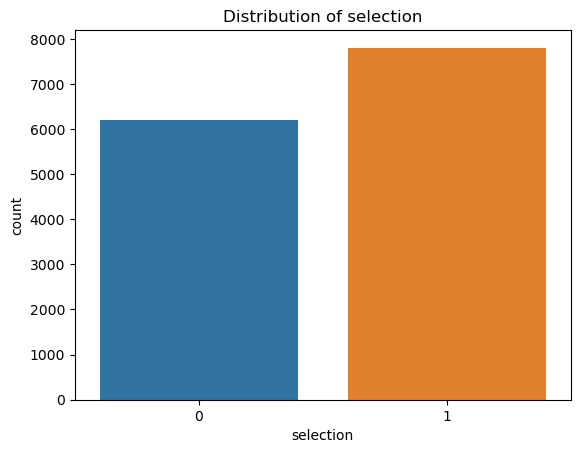

In [60]:
# Visualize the target variable distribution
sns.countplot(data=data, x='selection')
plt.title('Distribution of selection')
plt.show()

## Histograms for Numerical Variables

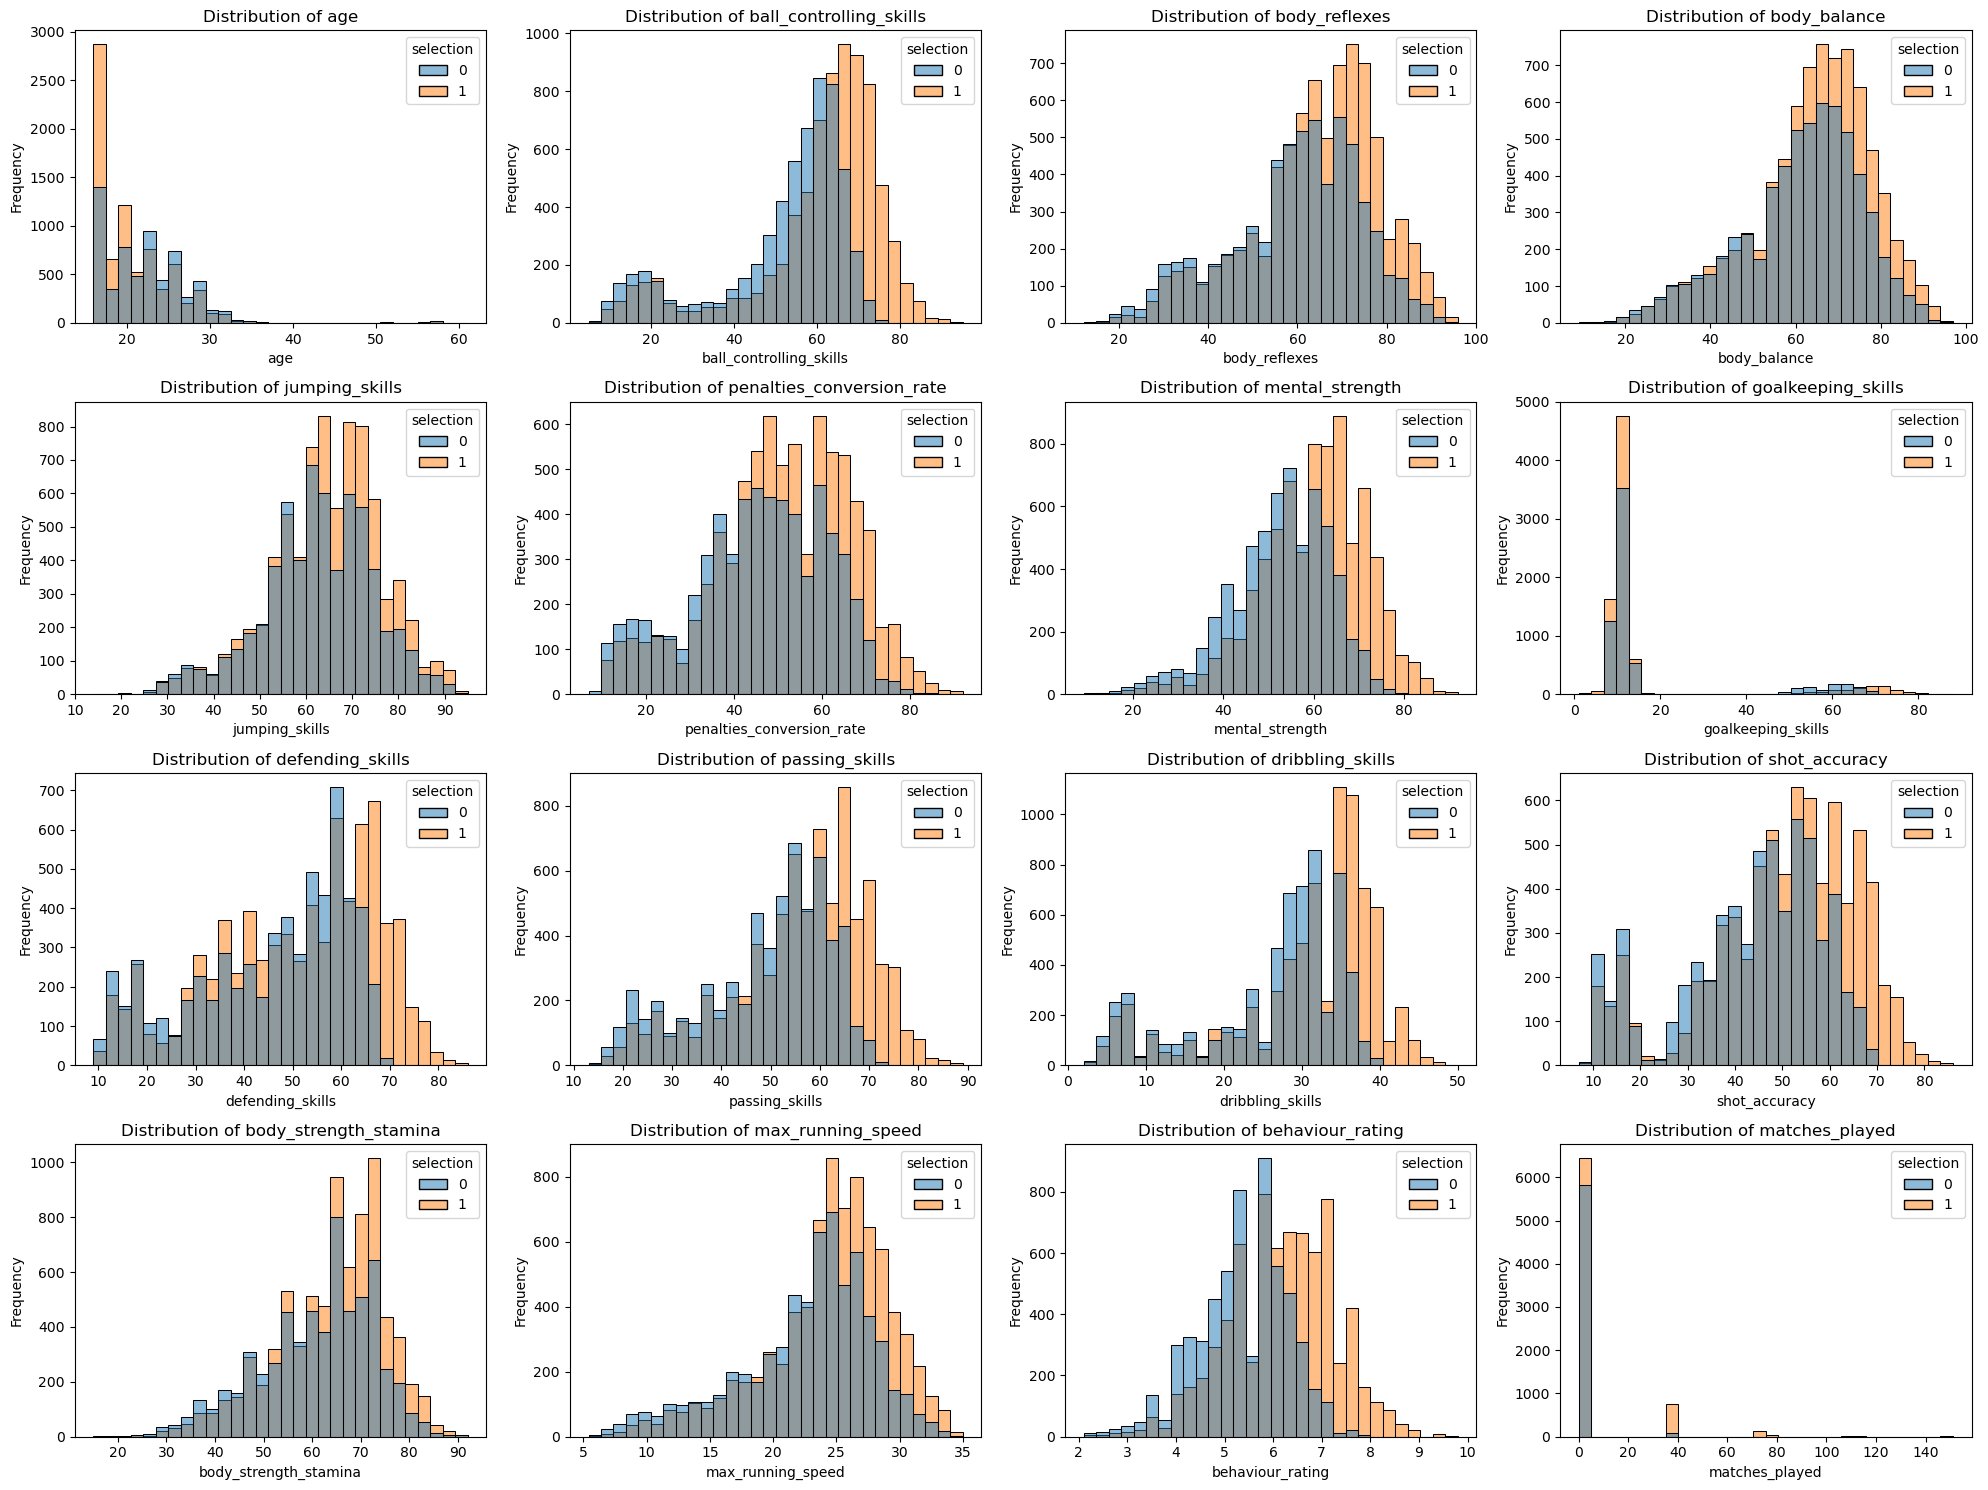

In [61]:
numerical_features = data.select_dtypes(include=['int64','float64']).columns[:16]

plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i) 
    sns.histplot(data=data, x=column,bins=30,hue='selection')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Correlation

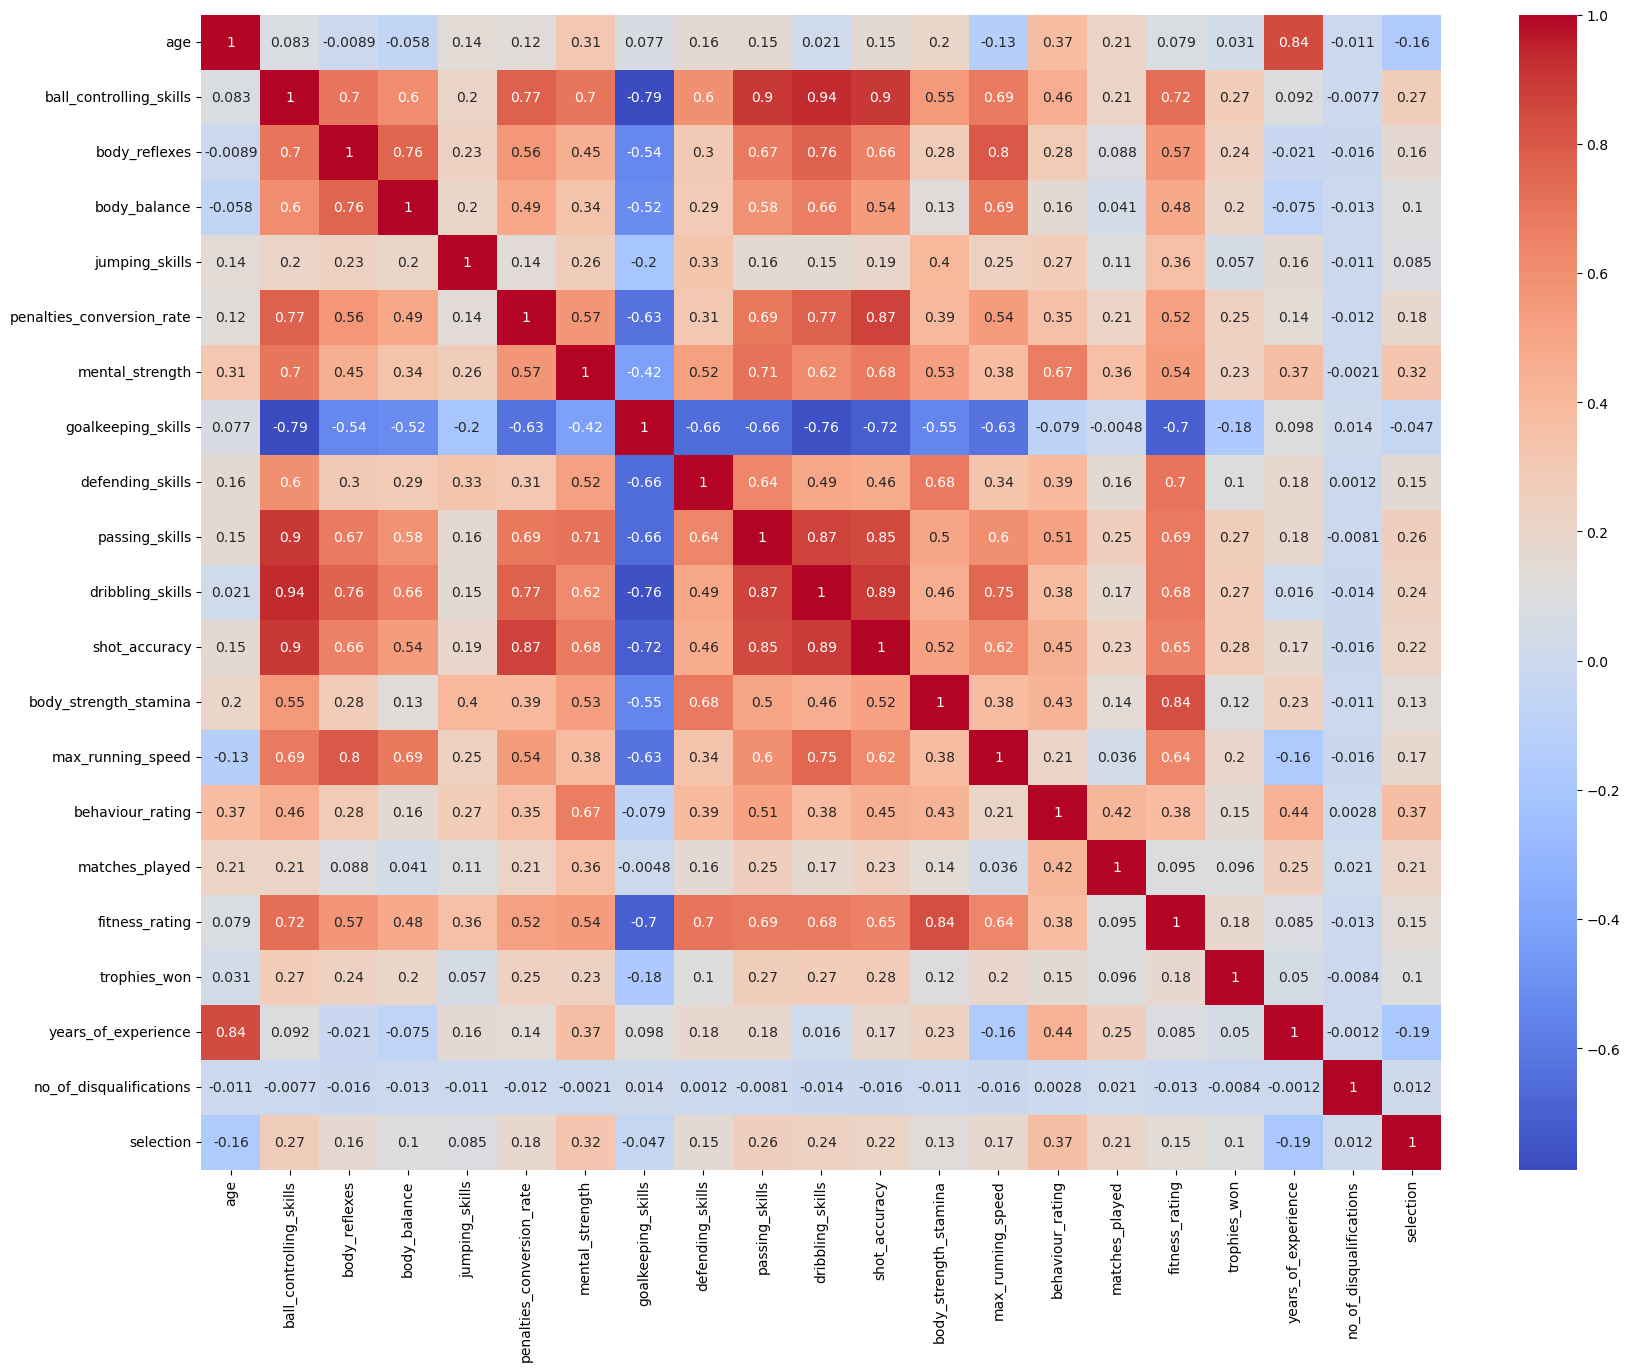

In [64]:
# Visualize the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(data.select_dtypes(('int64','float64')).corr(),annot=True,cmap='coolwarm')
plt.show()

# Data Preprocessing

## Handling null values 

In [13]:
#check null values
data.isnull().sum().sort_values(ascending=False)

strong_foot                  1833
behaviour_rating              703
fitness_rating                695
matches_played                666
shot_accuracy                 572
weight                        417
ball_controlling_skills       413
years_of_experience           144
coaching                      125
penalties_conversion_rate      30
mental_strength                28
jumping_skills                 24
gender                         19
player_id                       0
max_running_speed               0
dedication_level                0
no_of_disqualifications         0
trophies_won                    0
passing_skills                  0
body_strength_stamina           0
dribbling_skills                0
name                            0
defending_skills                0
goalkeeping_skills              0
body_balance                    0
body_reflexes                   0
height                          0
country                         0
age                             0
selection     

Inference:There are 13 features with null value. Also 4 among them are categorical features. So use corresponding mode for null value imputation. For the remaining 9 numerical features we can use the corresponding median for treating the null values.

In [15]:
#Chech skewness of numerical features
print(data['ball_controlling_skills'].skew())
print(data['jumping_skills'].skew())
print(data['penalties_conversion_rate'].skew())
print(data['mental_strength'].skew())
print(data['shot_accuracy'].skew())
print(data['behaviour_rating'].skew())
print(data['matches_played'].skew())
print(data['fitness_rating'].skew())
print(data['years_of_experience'].skew())

-1.2168547931358487
-0.42314517239116345
-0.3713933454623705
-0.4623425747442686
-0.6643148560595904
-0.11491673508261974
4.36151201865541
-0.8830056476839773
0.6613661067460076


In [18]:
#Nullvalue imputation for categorical features
cat_value_columns=data.select_dtypes(include=['object']).columns
for item in cat_value_columns:
    data[item]=data[item].fillna(value=data[item].mode()[0])
#Nullvalue imputation for numerical features
num_value_columns=data.select_dtypes(include=['int64','float64']).columns
for item in num_value_columns:
    data[item]=data[item].fillna(value=data[item].median())

In [19]:
#check again null values
data.isnull().sum().sort_values(ascending=False)

player_id                    0
name                         0
no_of_disqualifications      0
years_of_experience          0
coaching                     0
dedication_level             0
trophies_won                 0
fitness_rating               0
matches_played               0
behaviour_rating             0
strong_foot                  0
max_running_speed            0
body_strength_stamina        0
shot_accuracy                0
dribbling_skills             0
passing_skills               0
defending_skills             0
goalkeeping_skills           0
mental_strength              0
penalties_conversion_rate    0
jumping_skills               0
body_balance                 0
body_reflexes                0
ball_controlling_skills      0
weight                       0
height                       0
country                      0
gender                       0
age                          0
selection                    0
dtype: int64

## Handling outliers 

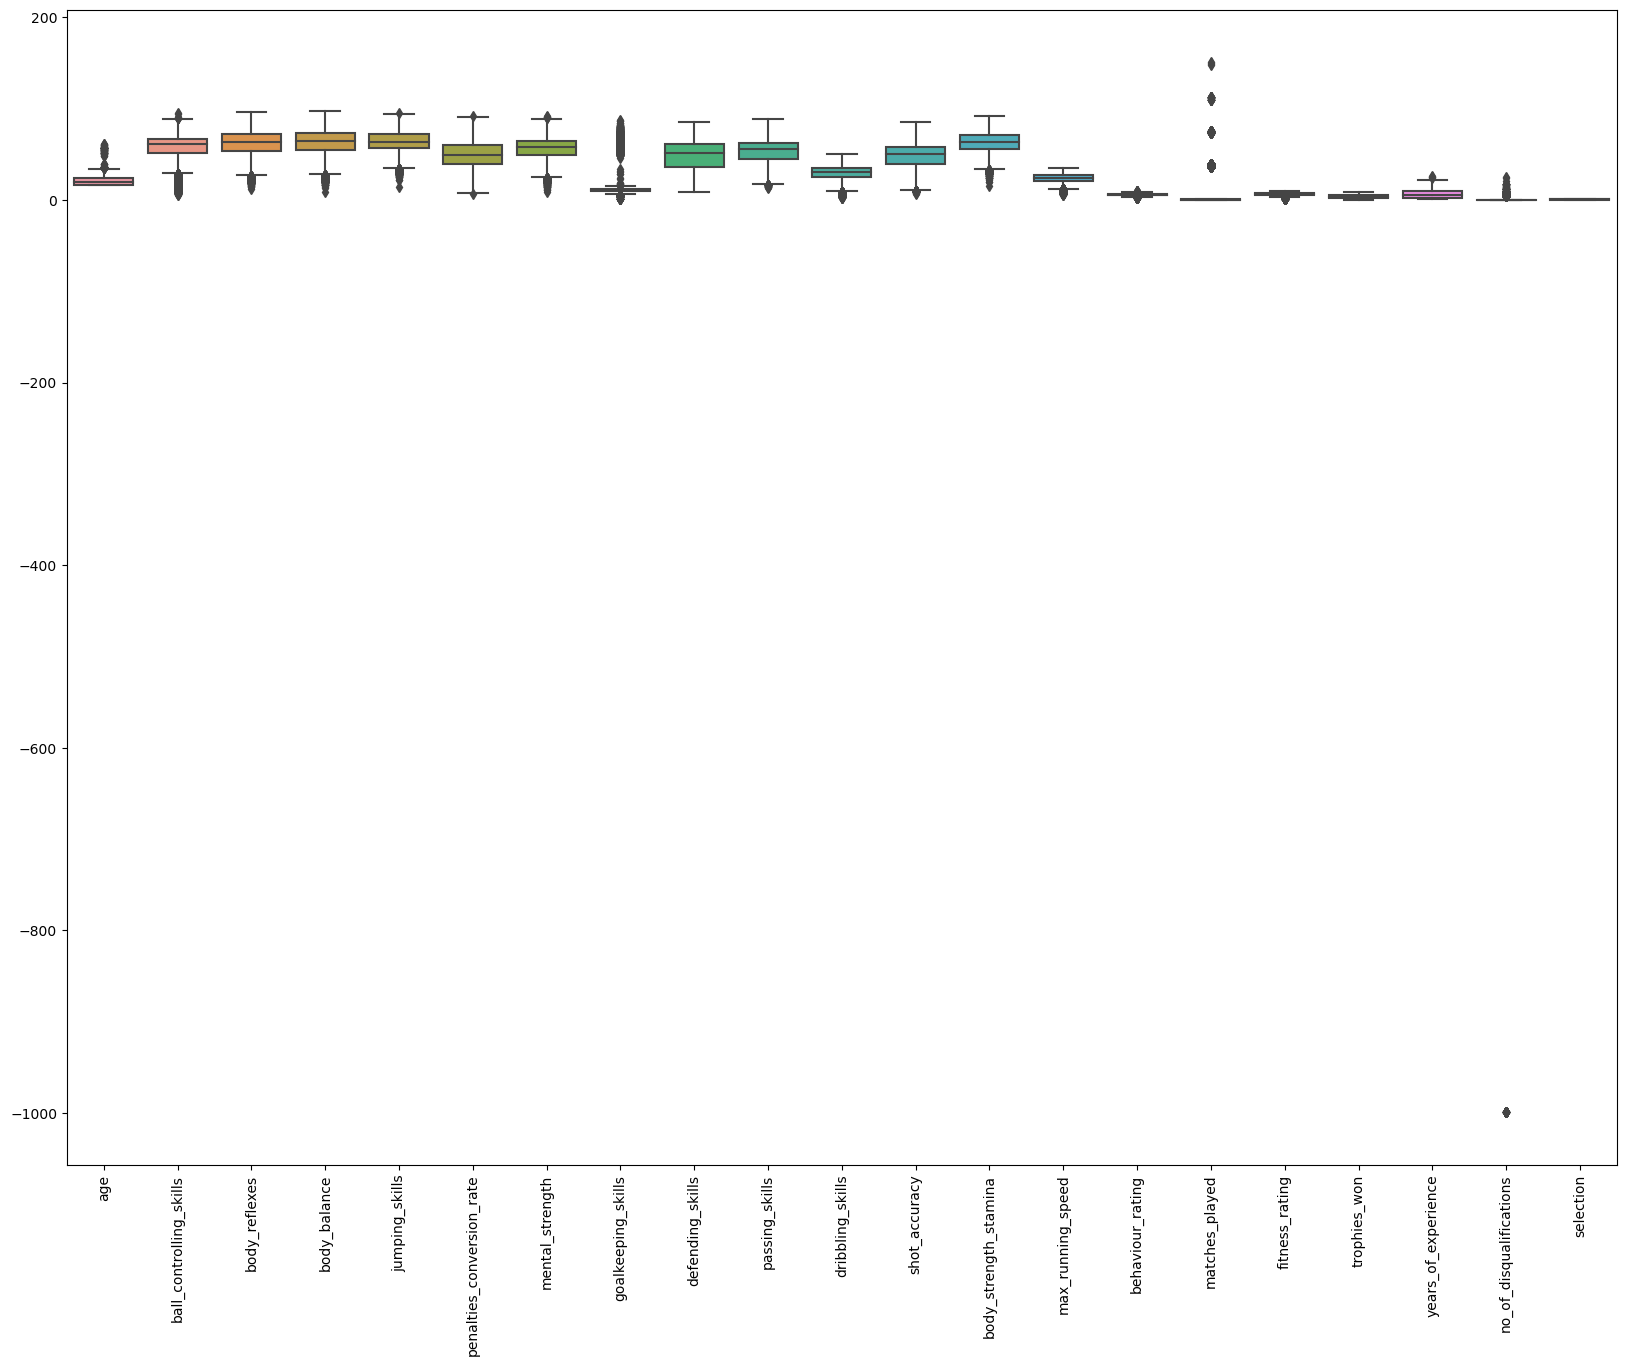

In [23]:
#check for outliers
plt.figure(figsize=(20, 15))
plt.xticks(rotation=90)
sns.boxplot(data)
plt.show()


Inference:There are many features containg outliers

Inference:We use IQR method for outlier detection and clip function for outlier treatment.

In [31]:
for i in data.select_dtypes(include=['int64','float64']).columns :    
    Q1=np.percentile(data[i],25,method='midpoint')
    Q3=np.percentile(data[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in data[i]:
        if ((j<low_lim)|(j > up_lim)):
            outliers.append(j)    
    data[i]=data[i].clip(lower=low_lim,upper=up_lim) 

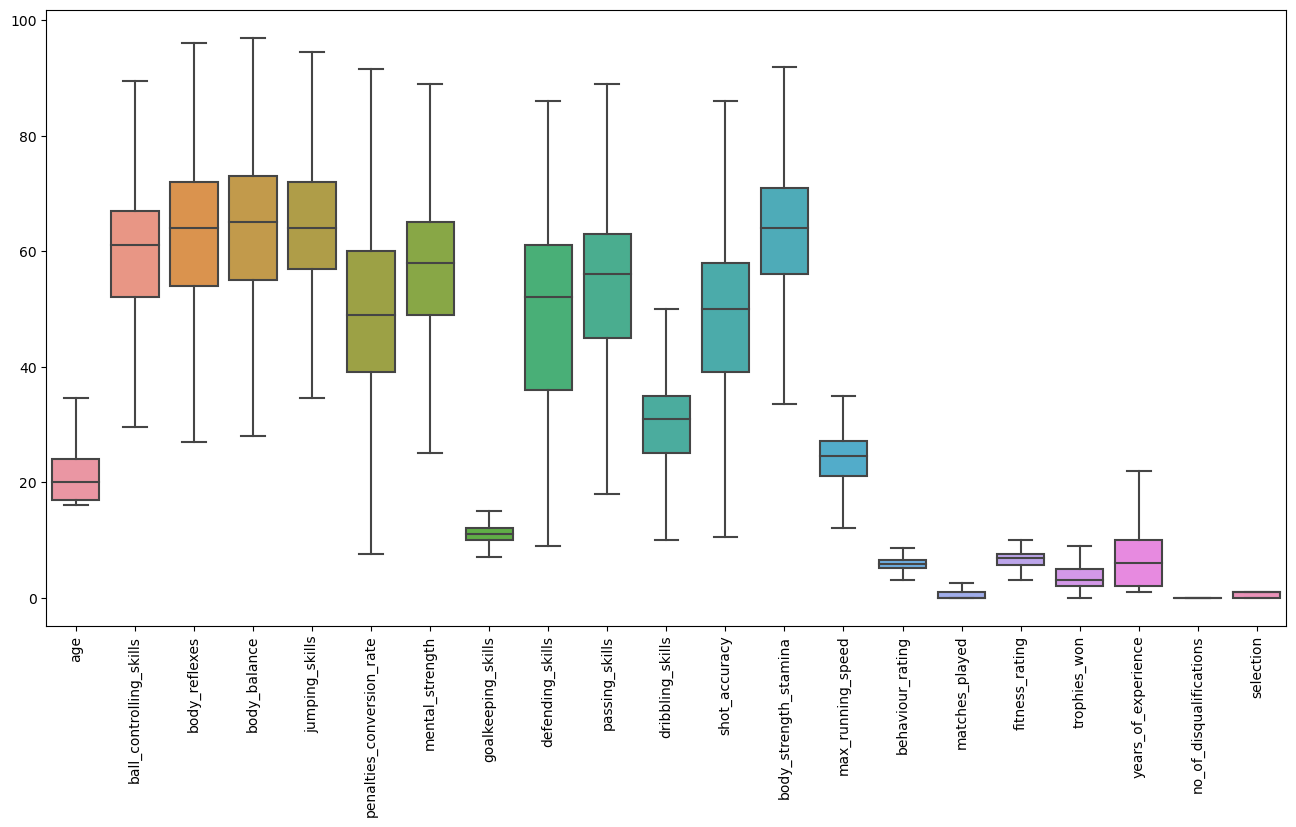

In [32]:
#check again for outliers
plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
sns.boxplot(data)
plt.show()

Inference:Outliers are removed

# Feature Engineering

## Label Encoding

In [34]:
#coverting categorical columns to numerical columns
categorical_columns= ['player_id','name','gender','country','height','weight','strong_foot','dedication_level','coaching']
le=LabelEncoder()
for i in categorical_columns:
    data[i]=le.fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  int32  
 1   name                       13994 non-null  int32  
 2   age                        13994 non-null  float64
 3   gender                     13994 non-null  int32  
 4   country                    13994 non-null  int32  
 5   height                     13994 non-null  int32  
 6   weight                     13994 non-null  int32  
 7   ball_controlling_skills    13994 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13994 non-null  float64
 11  penalties_conversion_rate  13994 non-null  float64
 12  mental_strength            13994 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

Inference:All categorical features are converted to numerical features.

## Seperating the target (y) and independent variables (x)

In [35]:
#Seperating the target (y) and independent variables (x)
x = data.drop('selection', axis=1)
y = data['selection']

## Standard scaling 

In [36]:
#Standard scaling x data
sc=StandardScaler()
x=sc.fit_transform(x)

## train test split

In [37]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

# Modeling

In [38]:
#K Fold Cross Validation
kfold_validator=KFold(10,shuffle=True,random_state=42)

## Decision Tree Classifier

In [39]:
#perform cross validation
dt_clf=DecisionTreeClassifier()
cv_dt_clf=cross_val_score(dt_clf,x_train,y_train,cv=kfold_validator)
print('Average Cross Validation score of DecisionTreeClassifier:',cv_dt_clf.mean())

Average Cross Validation score of DecisionTreeClassifier: 0.7664598483816787


## Logistic Regression 

In [40]:
#perform cross validation
log_reg=LogisticRegression()
cv_log_reg=cross_val_score(log_reg,x_train,y_train,cv=kfold_validator)
print('Average Cross Validation score of LogisticRegression:',cv_log_reg.mean())

Average Cross Validation score of LogisticRegression: 0.7641722275182714


## Random Forest Classifier

In [41]:
#perform cross validation
rf_clf=RandomForestClassifier()
cv_rf_clf=cross_val_score(rf_clf,x_train,y_train,cv=kfold_validator)
print('Average Cross Validation score of RandomForestClassifier:',cv_rf_clf.mean())

Average Cross Validation score of RandomForestClassifier: 0.8384944391483954


## Comparison Between Different Classification Models

In [42]:
print("Average Cross Validation score of Decision Tree Classifier:",cv_dt_clf.mean())
print("Average Cross Validation score of Logistic Regression:",cv_log_reg.mean())
print("Average Cross Validation score of Random Forest Classifier:",cv_rf_clf.mean())

Average Cross Validation score of Decision Tree Classifier: 0.7664598483816787
Average Cross Validation score of Logistic Regression: 0.7641722275182714
Average Cross Validation score of Random Forest Classifier: 0.8384944391483954


Inference: Average cross validation score is high for Random forest classifier. So we chose random forest classifier for prediction

# Prediction

In [44]:
#training the Random Forest model
rf_clf.fit(x_train,y_train)
# Making predictions
rf_pred=rf_clf.predict(x_test)
#Calculate accuracy
print("Accuracy score:",accuracy_score(y_test,rf_pred))

Accuracy score: 0.8430980280080023


## Evaluation metrics

In [45]:
Eval_metric=['Train Accuracy','Test Accuracy','Precision','Recall','F1 Score']
Eval_table= pd.DataFrame([[rf_clf.score(x_train,y_train)],
                     [accuracy_score(y_test,rf_pred)],
                     [precision_score(y_test,rf_pred)],
                     [recall_score(y_test,rf_pred)],
                     [f1_score(y_test,rf_pred)]],columns=['Evaluation Metrics of RandomForest'])
Eval_table.index=Eval_metric
Eval_table

,Evaluation Metrics of RandomForest
Train Accuracy,1.000000
Test Accuracy,0.843098
Precision,0.849974
Recall,0.861229
F1 Score,0.855564


Inference: There is high difference between train and test accuracy.So the model is overfitting. To overcome this problem we can use hyper parameter tuning.

# Hyper Parameter Tuning

In [46]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8],
    'criterion': ['gini', 'entropy']
}
# Set up RandomizedSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid)
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
print("Best Parameters (Random Search):", grid_search.best_params_)
print("Best Score (Random Search):", grid_search.best_score_)

Best Parameters (Random Search): {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300}
Best Score (Random Search): 0.8265840876607907


# Prediction using Best Parameters

In [47]:
rf_clf1=RandomForestClassifier(n_estimators=300,max_depth=8,criterion='gini',max_features= 'sqrt')
rf_clf1.fit(x_train,y_train)
rf_pred1=rf_clf.predict(x_test)

In [48]:
#Again check evaluation metrics
Eval_metric=['Train Accuracy','Test Accuracy','Precision','Recall','F1 Score']
Eval_table= pd.DataFrame([[rf_clf1.score(x_train,y_train)],
                     [accuracy_score(y_test,rf_pred1)],
                     [precision_score(y_test,rf_pred1)],
                     [recall_score(y_test,rf_pred1)],
                     [f1_score(y_test,rf_pred1)]],columns=['Evaluation Metrics of RandomForest'])
Eval_table.index=Eval_metric
Eval_table

,Evaluation Metrics of RandomForest
Train Accuracy,0.869652
Test Accuracy,0.843098
Precision,0.849974
Recall,0.861229
F1 Score,0.855564


Inference: now there is no so much difference between train  and test accuracy.By using hyperparameter tuning we reduced overfitting.Thereby we got best fit model.

## Confusion Matrix 

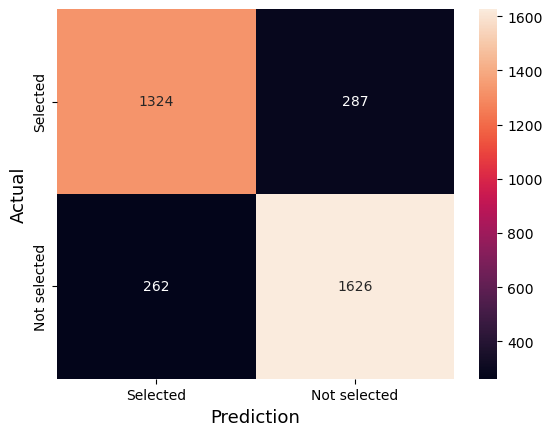

In [49]:
#displaying confusion matrix
cm = confusion_matrix(y_test,rf_pred1)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Selected','Not selected'],
            yticklabels=['Selected','Not selected'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.show()

## Classification report

In [50]:
#displaying classification report
print(classification_report(y_test,rf_pred1))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1611
           1       0.85      0.86      0.86      1888

    accuracy                           0.84      3499
   macro avg       0.84      0.84      0.84      3499
weighted avg       0.84      0.84      0.84      3499



The model provides(Random Forest) best accuracy result. So we got best fit model